<IPython.core.display.Javascript object>


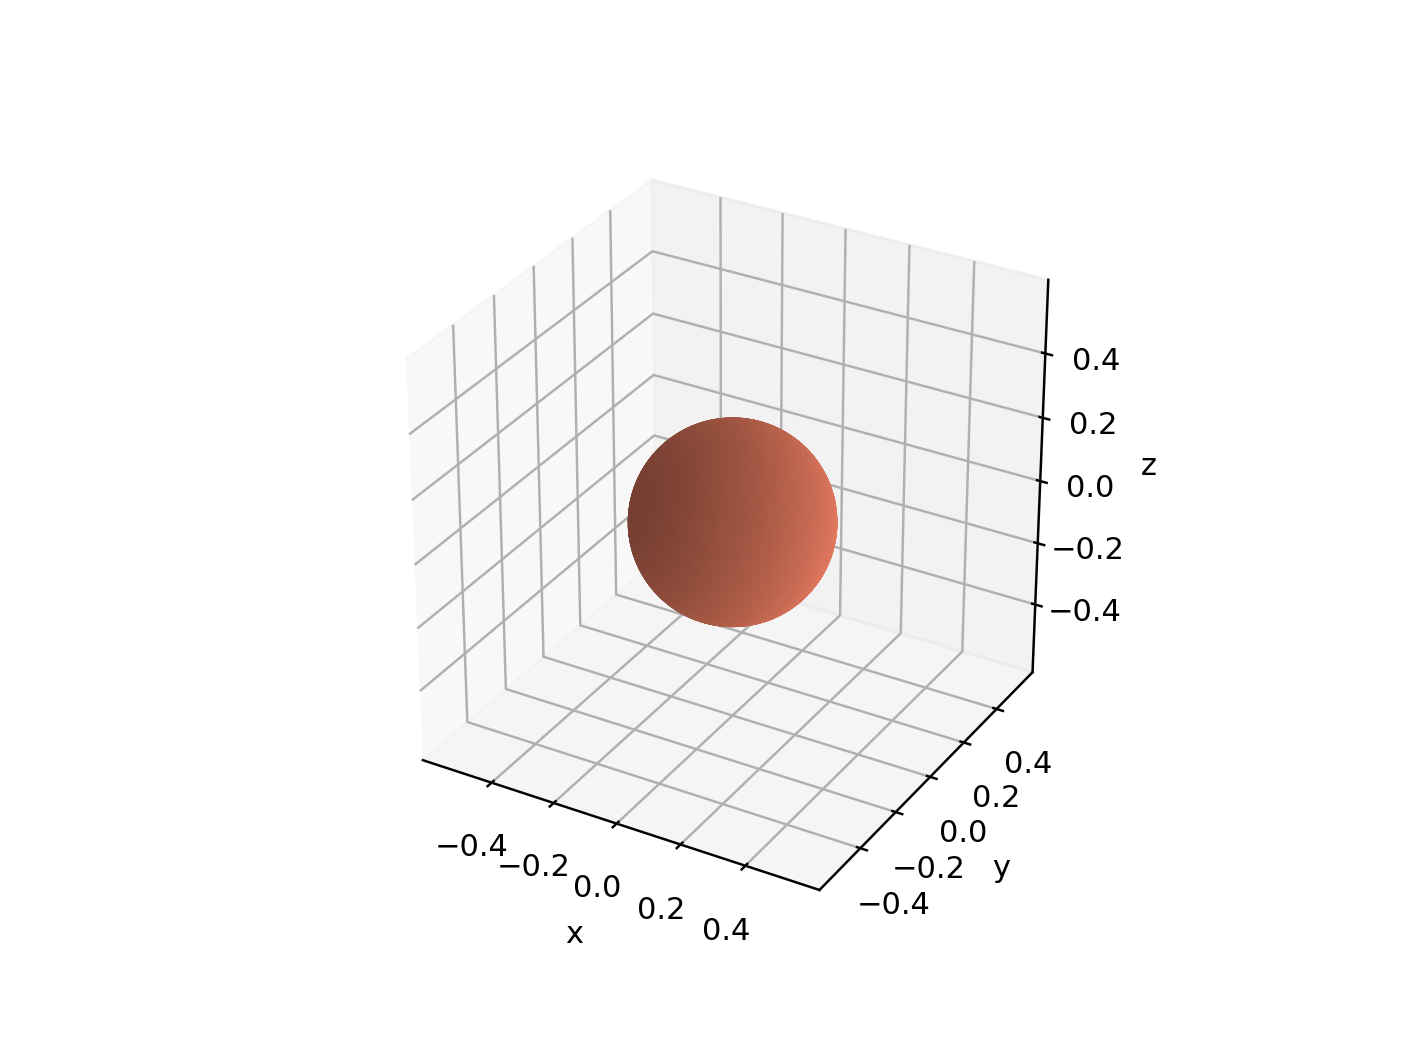

In [2]:
from pylab import *
from ipywidgets import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
%matplotlib notebook

#initial values
l0 = 0
ml0 = 0

#create data
theta = linspace(0, pi, 91)
phi   = linspace(0, 2*pi, 181)
theta, phi = meshgrid(theta, phi)
xyz = array([sin(theta) * sin(phi),
                sin(theta) * cos(phi),
                cos(theta)]) 

#create plot
fig = figure()
ax = plt.gca(projection = "3d")
Y_lml = sph_harm(ml0, l0, phi, theta)
r = abs(Y_lml.real)*xyz
colormap = cm.ScalarMappable( cmap=plt.get_cmap("coolwarm"))
colormap.set_clim(-.45, .45)
colormap2 = cm.ScalarMappable( cmap=plt.get_cmap("summer"))
colormap2.set_clim(-.45, .45)
surf = ax.plot_surface(r[0], r[1], r[2], rstride=2, cstride=2, facecolors=colormap.to_rgba(Y_lml.real))
limit = 0.6
ax.set_xlim(-limit,limit)
ax.set_ylim(-limit,limit)
ax.set_zlim(-limit,limit)
ax.set_aspect("equal")
lx=ax.set_xlabel('x')
ly=ax.set_ylabel('y')
lz=ax.set_zlabel('z')

l_slider = IntSlider(min=0, max=3, value=0)
ml_slider = IntSlider(min=0, max=0)
def update_ml_range(*args):
    ml_slider.min = -l_slider.value
    ml_slider.max = l_slider.value
l_slider.observe(update_ml_range, 'value')
def update(l=l0, ml=ml0, component='Real'):
    global surf, colormap, colormap2
    Y_lml = sph_harm(ml, l, phi, theta)
    r_real = abs(Y_lml.real)*xyz
    r_imag = abs(Y_lml.imag)*xyz
    surf.remove()
    if component == 'Real':
        surf = ax.plot_surface(r_real[0], r_real[1], r_real[2],
                                    rstride=2, cstride=2,
                                    facecolors=colormap.to_rgba(Y_lml.real))
    if component == 'Imaginary':
        surf = ax.plot_surface(r_imag[0], r_imag[1], r_imag[2],
                                    rstride=2, cstride=2,
                                    facecolors=colormap2.to_rgba(Y_lml.imag))
    draw()
i=interact(update,l=l_slider,ml=ml_slider,component=['Real', 'Imaginary'])